# 3 教師なし学習と前処理

## 3.1 教師なし学習の種類
* データセットの教師なし変換（Unsupervised transformations）は、元のデータ表現を変換して、人間や他の機械学習アルゴリズムにとって、よりわかりやすい新しいデータ表現をつくる
* 最も一般的なのは次元削減で、たくさんの特徴量で構成されるデータの高次元表現を入力として、少量の本質的な特徴を表す特徴量でそのデータを表す要約方法を見つける
* 次元削減は可視化のために次元数を2次元に減らす際にも用いられる
* 文書データのトピック抽出（ソーシャルメディア上の話題解析など）など、データを構成する部品、もしくは成分を見つけることに対しても教師なし学習は用いられる
* クラスタリングアルゴリズム（Clustering algorithm）は、データを似たような要素から構成されるグループに分けるアルゴリズム

## 3.2 教師なし学習の難しさ
* 教師なし学習は、アルゴリズムが学習したことの有用性の評価が難しい
* 教師なし学習の結果を評価するには、結果を人間が確かめるしかない
* 教師なし学習は、データサイエンティストがデータをより理解するために、探索的に用いられることが多い
* 教師あり学習の前処理ステップとして、データを新しい表現にしてから学習することで、教師ありアルゴリズムの精度が上がったり、メモリ使用量や計算時間が削減できる場合がある

## 3.3 前処理とスケール変換
* よく使われるのは特徴量ごとにスケール変換してずらす方法

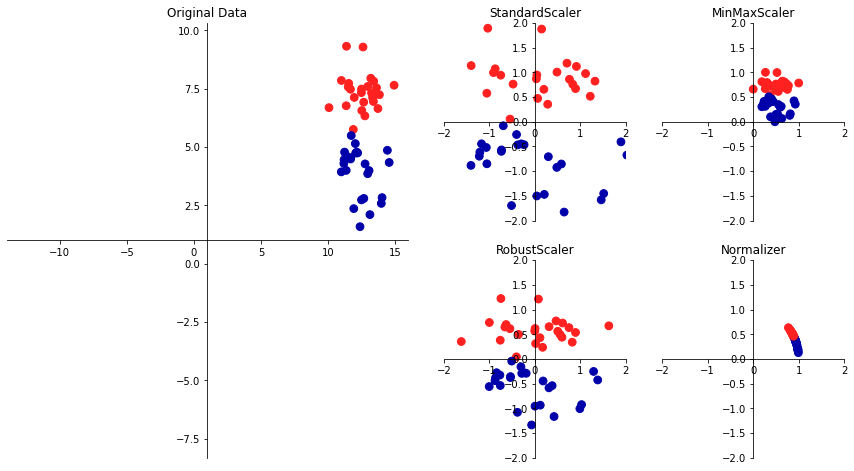

In [1]:
import mglearn

mglearn.plots.plot_scaling()

### 3.3.1 様々な前処理
* scikit-learnのStandardScalerは、個々の特徴量に平均が0で分散が1になるように変換し、すべての特徴量の大きさを揃えてくれるが、特徴量の最大値や最小値がある範囲に入ることを保証するものではない
* RobustScalerの動作は、個々の特徴量が一定の範囲に入るように変化するという意味ではStandardScalerに近いが、RobustScalerは平均値と分散のかわりに、中央値と四分位数を用いる
* このため、RobustScalerは、極端に他の値と異なるような値（測定エラーなどの外れ値）を無視する
* 外れ値は他のスケール変換方法では問題になる
* MinMaxScalerは、データがちょうど0から1の間に入るように変換する
* 2次元データセットで考えると、x軸が0から1、y軸が0から1の正方形にすべてのデータが入るように変換することになる
* Normalizerの変換は、個々のデータポイントを、特徴量ベクトルがユークリッド長1になるように変換する（データポイントを半径1の円（高次元なら超球面）に投射する）
* したがって、すべてのデータポイントに対してそれぞれ異なるスケール変換が行われるため、Normalizerは特徴ベクトルの長さではなく、方向（もしくは角度）だけが問題になる場合に用いられる

### 3.3.2 データ変換の適用


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from icecream import ic

cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)

ic(X_train.shape)
ic(X_test.shape)

ic| X_train.shape: (426, 30)
ic| X_test.shape: (143, 30)


(143, 30)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
# スケール変換器のfitメソッドにはデータ（X_train）のみ与え、y_trainは用いない
scaler.fit(X_train)

MinMaxScaler()

* 実際に訓練データをスケール変換するには、スケール変換器のtransformメソッドを用いる

In [4]:
# データを変換
X_train_scaled=scaler.transform(X_train)
# スケール変換のデータ特性を表示
ic(X_train_scaled.shape)
ic(X_train.min(axis=0))
ic(X_train.max(axis=0))
ic(X_train_scaled.min(axis=0))
ic(X_train_scaled.max(axis=0))

ic| X_train_scaled.shape: (426, 30)
ic| X_train.min(axis=0): array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
                                0.000e+00, 0.000e+00, 1.060e-01, 5.024e-02, 1.153e-01, 3.602e-01,
                                7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
                                9.539e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
                                7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.566e-01, 5.521e-02])
ic| X_train.max(axis=0): array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 2.867e-01,
                                4.268e-01, 2.012e-01, 3.040e-01, 9.575e-02, 2.873e+00, 4.885e+00,
                                2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
                                6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
                                2.226e-01, 9.379e-01, 1.170e+00, 2.910e-01, 5.774

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

* テストセットの方も変換する必要がある

In [5]:
# テストデータを変換
X_test_scaled=scaler.transform(X_test)
# スケール変換の前後のデータ特性を表示
ic(X_test_scaled.min(axis=0))
ic(X_test_scaled.max(axis=0))

ic| X_test_scaled.min(axis=0): array([ 0.0336031 ,  0.0226581 ,  0.03144219,  0.01141039,  0.14128374,
                                       0.04406704,  0.        ,  0.        ,  0.1540404 , -0.00615249,
                                      -0.00137796,  0.00594501,  0.00430665,  0.00079567,  0.03919502,
                                       0.0112206 ,  0.        ,  0.        , -0.03191387,  0.00664013,
                                       0.02660975,  0.05810235,  0.02031974,  0.00943767,  0.1094235 ,
                                       0.02637792,  0.        ,  0.        , -0.00023764, -0.00182032])
ic| X_test_scaled.max(axis=0): array([0.9578778 , 0.81501522, 0.95577362, 0.89353128, 0.81132075,
                                      1.21958701, 0.87956888, 0.9333996 , 0.93232323, 1.0371347 ,
                                      0.42669616, 0.49765736, 0.44117231, 0.28371044, 0.48703131,
                                      0.73863671, 0.76717172, 0.62928585, 1.33685792, 0

array([0.9578778 , 0.81501522, 0.95577362, 0.89353128, 0.81132075,
       1.21958701, 0.87956888, 0.9333996 , 0.93232323, 1.0371347 ,
       0.42669616, 0.49765736, 0.44117231, 0.28371044, 0.48703131,
       0.73863671, 0.76717172, 0.62928585, 1.33685792, 0.39057253,
       0.89612238, 0.79317697, 0.84859804, 0.74488793, 0.9154725 ,
       1.13188961, 1.07008547, 0.92371134, 1.20532319, 1.63068851])

* テストセットの場合にスケール変換後の最小値と最大値は0と1にならないのは、MinMaxScaler（他のスケール変換器もそうだが）が常に訓練データとテストデータに、まったく同じ変換（訓練データの最小値を引き、訓練データのレンジで割る）を施すから

### 3.3.3 訓練データとテストデータを同じように変換する
* 教師ありモデルをテストセットに対して適用する際に、テストセットを訓練セットと全く同じように変換することは重要
* 下の例は、訓練セットではなく、テストセットの最小値とレンジを用いた場合の悪い例

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

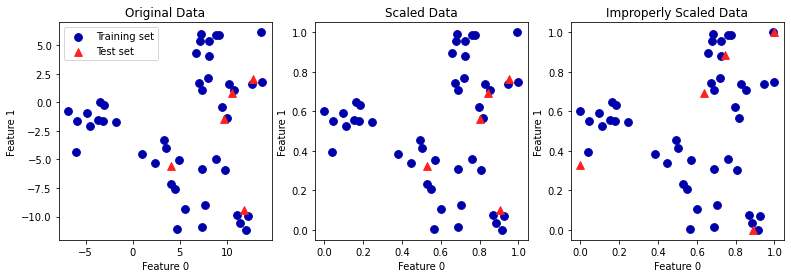

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 合成データを作成
X,_=make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
# 訓練セットとデータセットに分割
X_train,X_test=train_test_split(X,random_state=5,test_size=.1)

# 訓練セットとテストセットをプロット
fig,axes=plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label='Training set',s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2(1),label='Test set',s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

# MinMaxScalerでデータをスケール変換
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label='Training set',s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2(1),label='Test set',s=60)
axes[1].set_title('Scaled Data')

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0,1になる（実際にやってはいけない！）
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly=test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label='training set',s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',c=mglearn.cm2(1),label='test set',s=60)
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

* 右のグラフは訓練セットとテストセットを別々に変換した場合を示している
* テストデータポイントと訓練データポイントが別々に変換されているので、お互いに対して動いてしまっている（これは、データを変えていることと同義）

##### 効率の良いショートカット
* fit_transformメソッドでモデルをfitしてからtransformすることができる

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X,_=make_blobs(n_samples=5)

scaler=StandardScaler()

# fitとtransformを続けて呼ぶ（メソッドチェーンを使って）
X_scaled=scaler.fit(X).transform(X)
# 同じ結果になるが、より効率的に計算される
X_scaled_d=scaler.fit_transform(X)

ic(X)
ic(X_scaled)
ic(X_scaled_d)

ic| X: array([[-1.75139012,  7.79922037],
              [-1.07512962,  9.00678622],
              [ 4.87612556,  0.6029295 ],
              [-8.7081504 , -2.98459292],
              [ 5.97032212,  2.30424892]])
ic| X_scaled: array([[-0.30564486,  0.99304794],
                     [-0.17756052,  1.26231263],
                     [ 0.9496125 , -0.61159082],
                     [-1.62326144, -1.41154146],
                     [ 1.15685431, -0.23222829]])
ic| X_scaled_d: array([[-0.30564486,  0.99304794],
                       [-0.17756052,  1.26231263],
                       [ 0.9496125 , -0.61159082],
                       [-1.62326144, -1.41154146],
                       [ 1.15685431, -0.23222829]])


array([[-0.30564486,  0.99304794],
       [-0.17756052,  1.26231263],
       [ 0.9496125 , -0.61159082],
       [-1.62326144, -1.41154146],
       [ 1.15685431, -0.23222829]])

### 3.3.4 教師あり学習における前処理の効果

In [19]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
svm=SVC(C=100)
svm.fit(X_train,y_train)
ic(svm.score(X_test,y_test))

ic| svm.score(X_test,y_test): 0.9440559440559441


0.9440559440559441

* MinMaxScalerを使ってスケール変換する

In [20]:
# 0-1スケール変換で前処理
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled,y_train)

# 変換されたテストセットでスコア計算
ic(svm.score(X_test_scaled,y_test))

ic| svm.score(X_test_scaled,y_test): 0.965034965034965


0.965034965034965

* データに対するスケール変換の影響は非常に大きい
* 前処理のクラスはどれも、fitメソッドとtransformメソッドの同じインターフェースを持つ

In [22]:
# 平均0、分散1に前処理
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled,y_train)

ic(svm.score(X_test_scaled,y_test))

ic| svm.score(X_test_scaled,y_test): 0.958041958041958


0.958041958041958

### 3.4 次元削減、特徴量抽出、多様体学習
* 可視化、データの圧縮、以降の処理に適した表現の発見には、主成分分析が最もよく用いられる

### 3.4.1 主成分分析（PCA）
* データセットの特徴量を相互に統計的に関連しないように回転する手法
* 多くの場合、回転したあとの特徴量から、データを説明するのに重要な一部の特徴量だけを抜き出す

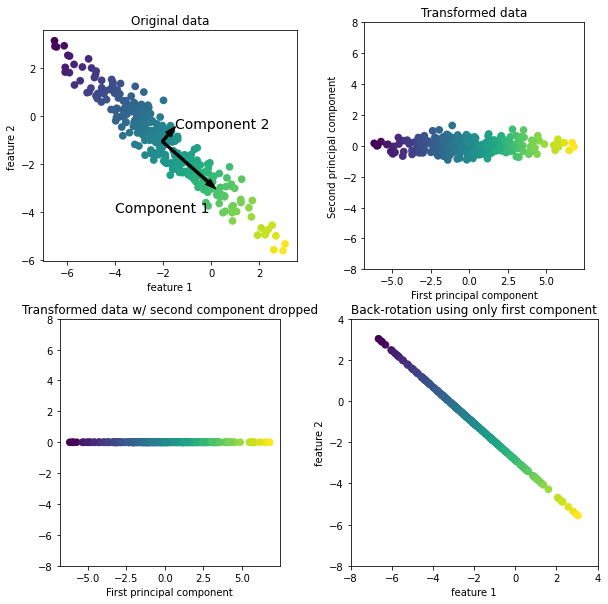

In [23]:
mglearn.plots.plot_pca_illustration()

* まず最も分散が大きい方向を見つけ、それに第一成分という名前をつける
* データはこの方向（もしくはベクトル）に対して最も情報を持つ（この方向は特徴量が最も相互に関係する方向）
* 次に、第一成分と直交する方向の中から、最も情報を持っている方向を探す（高次元空間ではいくらでもたくさんの直交する方向がある）
* ここで、成分の方向はどちらを向いていても関係なく、傾きと大きさだけが重要
* このようにして見つけていく方向を主成分と呼ぶ
* 一般には、もとの特徴量と同じ数だけ主成分が存在する
* 右上のプロットは、同じデータを最初の成分がx軸に沿い、2つ目の主成分がy軸に沿うように回転させたもの
* 原点周辺にデータが来るように、回転させる前にデータから平均値を引いている
* PCAで見つかった回転後の表現では、2つの軸に相関はない（この表現でのデータの相関行列は、対角成分を除いてゼロになる）
* 主成分のうちいくつかだけを残すことで、PCAを次元削減に使うこともできる（左下のプロットは1つ目の主成分だけ残し、2次元のデータセットを1次元にしている）
* もとの特徴量のうち1つを残しているわけではなく、最も興味深い方向、すなわち第1主成分を見つけ、その方向を維持している
* 逆回転して平均を足し、データをもとに戻すこともできる（右下のプロット）
* データポイントはもとの特徴量空間にあるが、第1主成分に含まれている情報しか維持されていない
* このような変換は、データからノイズを取り除いたり、主成分で維持された情報を可視化するために用いられることがある

#### 3.4.1.1 cancerデータセットのPCAによる可視化
* まずは、単純な可視化手法として、特徴量ごとに二つのクラス（良性と悪性）のヒストグラムを見てみる

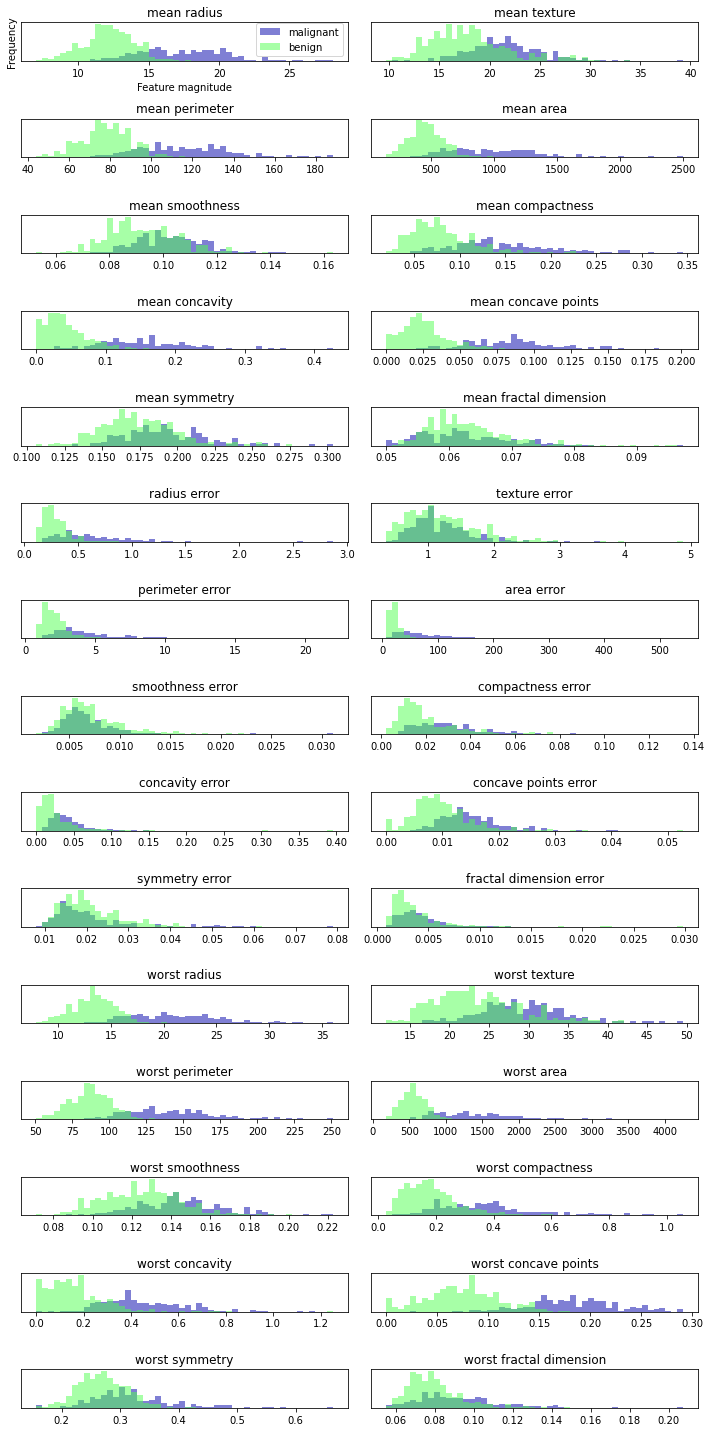

In [25]:
import numpy as np
import matplotlib.pyplot as plt

fig,axes=plt.subplots(15,2,figsize=(10,20))
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

* 個々のデータポイントの特徴量が特定のレンジ（ビン）に何回入ったかを数えることで、特徴量ごとにヒストグラムを作っている
* 個々の特徴量の二つのクラスに対する分布がわかり、どの特徴量が良性と悪性を見分けるのに役に立ちそうかを類推することができる
* ただし、このプロットを見ても、個々の特徴量の相関や、それがクラス分類に与える影響については何もわからない
* PCAを用いると、主な相関を捉えることができるので、もう少し全体像が見やすくなる
* PCAを適用する前に、データをStandardScalerでスケール変換し、個々の特徴量の分散が1になるようにする

In [26]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

scaler=StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

* PCAはデフォルトではデータの回転（とシフト）しか行わず、すべての成分を維持する
* データの次元削減を行う場合は、PCAオブジェクトを作る際に、維持する主成分の数を指定する必要がある

In [27]:
from sklearn.decomposition import PCA
# データの最初の二つの主成分だけ維持する
pca=PCA(n_components=2)
pca.fit(X_scaled)

# 最初の2つの主成分に対してデータポイントを変換
X_pca=pca.transform(X_scaled)
ic(X_scaled.shape)
ic(X_pca.shape)

ic| X_scaled.shape: (569, 30)
ic| X_pca.shape: (569, 2)


(569, 2)

* これで、最初の2つの主成分に対してプロットできる

Text(0, 0.5, 'Second principal component')

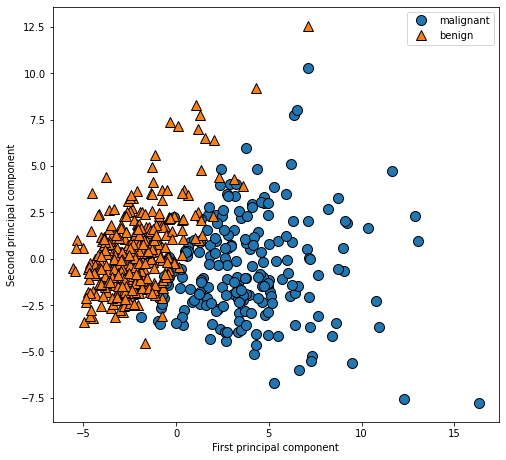

In [28]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

* PCAは教師なし手法であり、適切な回転を発見する際にはまったくクラス情報を用いていない
* PCAの欠点は、プロットした2つの軸の解釈が容易ではない場合が多いこと
* 主成分は、PCAの適合を行う過程で、components_属性に格納される

In [29]:
ic(pca.components_.shape)

ic| pca.components_.shape: (2, 30)


(2, 30)

* components_のそれぞれの行が1つの主成分に対応する
* 行は主成分によってソートされている
* 列はPCA変換する前のもとの特徴量に対応する

In [31]:
display(pca.components_)

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

* 係数をヒートマップで見ることもできる（こちらのほうが少しわかりやすい）

Text(0, 0.5, 'Principal components')

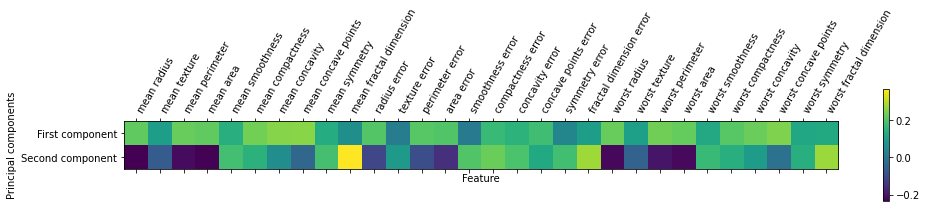

In [33]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First component','Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')

* 第1成分はすべての特徴量が同じ符号になっていることがわかり、これは、すべての特徴量に一般的な相関があることを意味する（ある特徴量が大きくなると他の特徴量も大きくなる）
* 第2成分の符号は入り混じっており、両方とも30の特徴量すべてが混ざっているため、説明するのが難しい

#### 3.4.1.2 固有顔による特徴量抽出
* PCAのもう一つの利用方法に特徴量抽出がある
* 特徴量抽出の背後には、データには与えられたもともとの表現よりも、解析に適した表現があり、それを見つけることが可能だ、という考えがある
* 特徴量抽出が効果を持つアプリケーションとしては画像関連が挙げられる


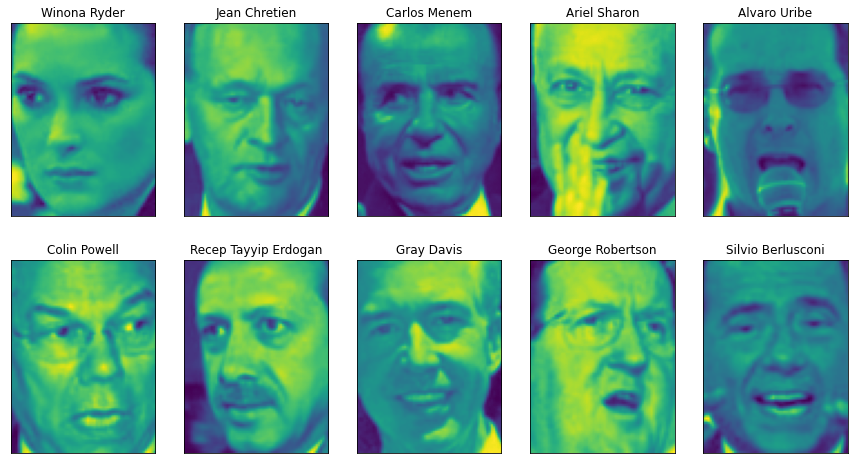

In [8]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape=people.images[0].shape

fix,axes=plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()},facecolor='w')
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])


In [37]:
ic(people.images.shape)
ic(len(people.target_names))

ic| people.images.shape: (3023, 87, 65)
ic| len(people.target_names): 62


62

In [11]:
import numpy as np

# 各ターゲットの出現回数をカウント
counts=np.bincount(people.target)
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print('{0:25}{1:3}'.format(name,count),end='    ')
    if (i+1)%3==0:
        print()

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock         24    
Jiang Zemin               20  

* データの量に偏りがあるため、各人の画像を50に制限する（こうしないと特徴量抽出が多いデータの特徴に偏ってしまう）

In [12]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

# 0から255で表現されている、グレースケールの値0と1の間に変換
# こうしたほうが、数値的に安定する
X_people=X_people/255.

<ipython-input-12-4a158ea83099>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros(people.target.shape,dtype=np.bool)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 訓練セットとテストセットにデータを分割
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
# KNeighborsClassefierを1-最近傍で構築
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
ic(knn.score(X_test,y_test))

ic| knn.score(X_test,y_test): 0.23255813953488372


0.23255813953488372

* ピクセル表現で2つの画像を比較するということは、相互の画像の対応するピクセルの値を比較することになる
* ピクセルで距離を測ると、1ピクセル画像をずらすだけで、表現が全く変わってしまい、大きく変化したことになるため、人間が顔画像を解釈する方法と全く異なる
* そこで、PCAにより主成分に沿った距離を使うことで、精度が上がらないか試してみる

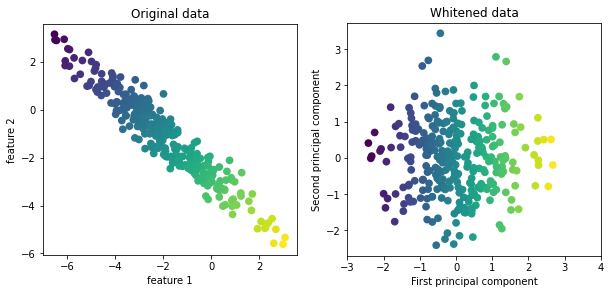

In [14]:
import mglearn
mglearn.plots.plot_pca_whitening()

In [15]:
from sklearn.decomposition import PCA
from icecream import ic

# PCAオブジェクトを訓練し、最初の100成分を抜き出す
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

ic(X_train_pca.shape)

ic| X_train_pca.shape: (1547, 100)


(1547, 100)

In [16]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
ic(knn.score(X_test_pca,y_test))

ic| knn.score(X_test_pca,y_test): 0.312015503875969


0.312015503875969

* PCAにより抜き出した主成分でモデルを訓練することで、精度が向上した

In [17]:
ic(pca.components_.shape)

ic| pca.components_.shape: (100, 5655)


(100, 5655)

* 入力y空間は87*65ピクセルのグレースケール画像なので、この空間での主成分の方向は87*65（=5655）ピクセルのグレースケール画像になる

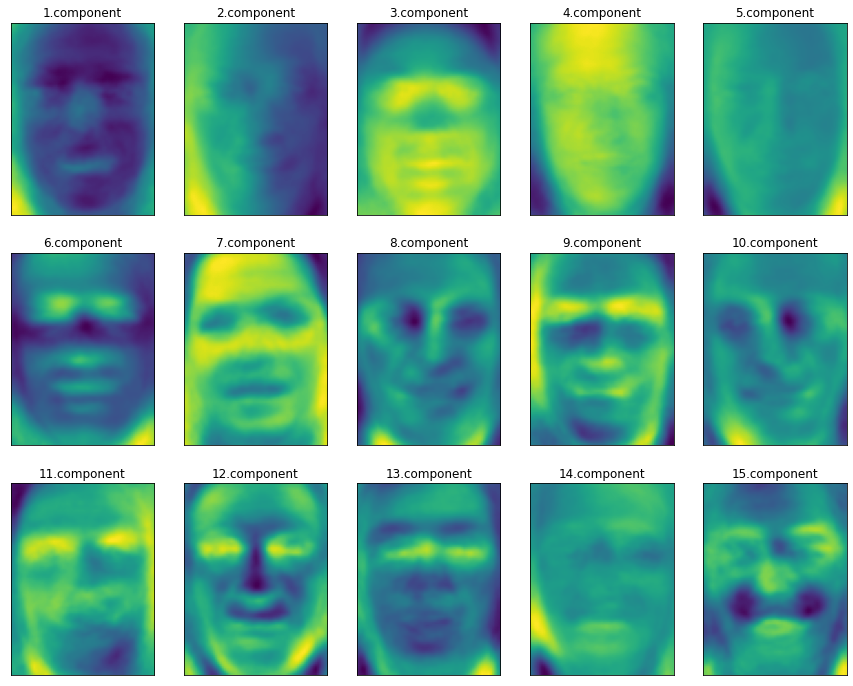

In [20]:
fig,axes=plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()},facecolor='w')
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}.component".format((i+1)))

* PCAモデルもピクセル値に基づいているので、顔のアライメント（目、顎、鼻の位置）や光の当たり具合などに強く影響を受けてしまうが、人間が顔を認識するときは、アライメントや光のあたり具合は重要視されていないはず
* アルゴリズムがデータを解釈する方法は、多くの場合人間の解釈する方法とはまったく違っていることに留意
* PCA変換は回転させてから分散が小さい成分を取り除く手法という解釈の他に、テストデータポイントを主成分の重み付き和として表現する、一連の数字（PCAで回転後の新しい特徴量）を見つける手法という解釈もある

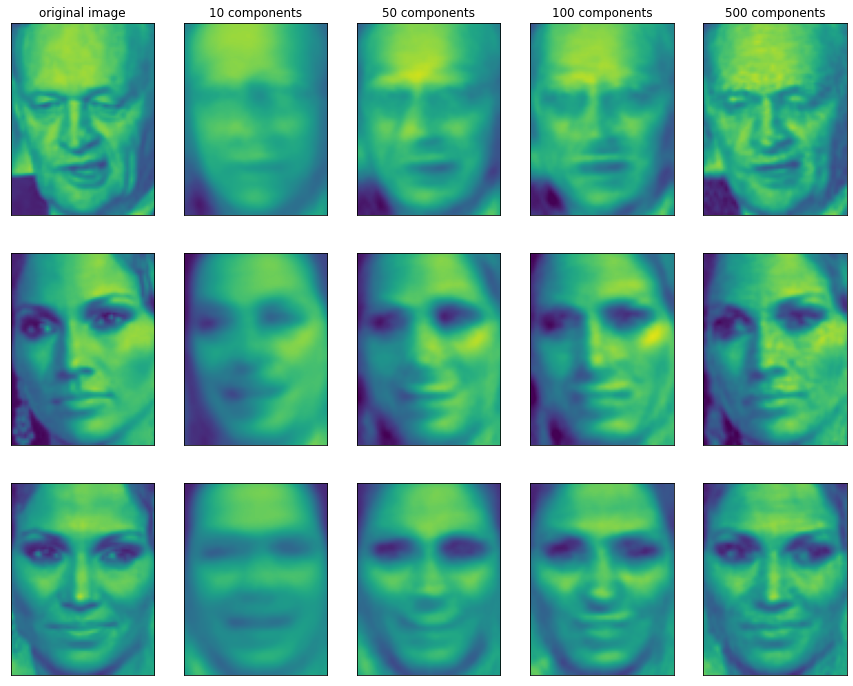

In [24]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

* 上図は主成分のいくつかだけ残したものを逆に回転し、もとの空間に戻した特徴量によって再構成した顔画像
* より多くの項（主成分）を入れることによって、画像の詳細が最構成されている
* ピクセル数と同数の主成分を使うことは、回転後に情報を全く落とさないことを意味し、画像は完全に再構成される

Text(0, 0.5, 'Second principal component')

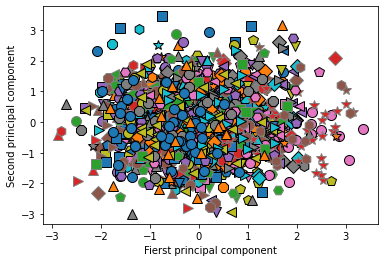

In [25]:
# PCAを用いてすべての顔画像の最初の2つの主成分をプロット
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel('Fierst principal component')
plt.ylabel('Second principal component')

* 最初の2成分だけでは、データがひとまとまりになってしまい、クラスを分類できそうにない
* 10の主成分を用いても、PCAでは顔の非常に荒い特徴しか捉えられない